## Observatories

-CTIO  
-ASKAP  
-MeerKAT  
-KMTNet  

##  Goals:
----
— Plot airmass of given RA and DEC and given date for CTIO as a function of time  
— Plot airmass of given RA and DEC and given date range for CTIO as a function of time   
— Plot airmass of RA and DEC, given date range for CTIO, ASKAP, MeerKAT, KMTNet as a function of time  
— Plot airmass of RA and DEC, given date range, given Telescope’s long, lat, altitude  
Plot airmass of RA and DEC, given date range, given a few Telescopes’ long, lat, altitude  
  
----
— Input date range, target RA DEC, scopes’ long, lat, altitude, print when can co-observe  
  Input date range, scopes’ long, lat, alt, plot 2D color plot of how long each RA and DEC can be   
  observed for (y-axis: RA, x-axis: DEC, color bar: number of hours/ amount of time)
  
----
— Get FRB list given RA, DEC range  
— Get FRB list given Scopes and minimum co-observability time  


In [1]:
from astropy.time import Time
from astroplan import download_IERS_A 
import pandas as pd

from astropy.coordinates import EarthLocation
from astroplan import Observer,FixedTarget
import astroplan
from astroplan.plots import plot_airmass,plot_altitude
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import common_timezones
import pyorbital





pd.set_option("display.max_rows", None, "display.max_columns", None)

%matplotlib inline

In [2]:
#common_timezones

In [3]:
download_IERS_A()


### Setting up target(s)

In [4]:
hydraA=FixedTarget.from_name("Hydra_A")   
#selecting target  - Hydra_A
Ra,Dec=hydraA.ra,hydraA.dec                 #Extracting RA and Dec  since not manually imputed 
print(hydraA,Ra, Dec)                                #Checking if correct values were loaded



<FixedTarget "Hydra_A" at SkyCoord (ICRS): (ra, dec) in deg (139.52354583, -12.09555278)> 139d31m24.765s -12d05m43.99s


In [5]:
hydraA=FixedTarget.from_name("hydra_A")   
#selecting target  - Hydra_A
Ra,Dec=hydraA.ra,hydraA.dec                 #Extracting RA and Dec  since not manually imputed 
print(hydraA,Ra, Dec)                                #Checking if correct values were loaded


<FixedTarget "hydra_A" at SkyCoord (ICRS): (ra, dec) in deg (139.52354583, -12.09555278)> 139d31m24.765s -12d05m43.99s


### Setting up observatory locations

In [6]:
ctio = Observer.at_site("ctio", timezone = 'America/Santiago')
print(ctio)

kmtnet = Observer.at_site("Siding Spring Observatory", name='KMTNET',timezone = 'Australia/Sydney')
print(kmtnet)


location_meerkat = EarthLocation.from_geodetic(21.44407*u.deg,-30.71369*u.deg,1050*u.m)
meerkat= Observer(location=location_meerkat, name="MeerKaT", timezone='Africa/Johannesburg')
print(meerkat)


location_askap = EarthLocation.from_geodetic(116.637*u.deg,-26.696*u.deg,377.83*u.m)
askap = Observer(location=location_askap, name="ASKAP", timezone='Australia/Perth')
print(askap)

<Observer: name='ctio',
    location (lon, lat, el)=(-70.81500000000001 deg, -30.165277777777778 deg, 2214.9999999993697 m),
    timezone=<DstTzInfo 'America/Santiago' LMT-1 day, 19:17:00 STD>>
<Observer: name='KMTNET',
    location (lon, lat, el)=(149.06119444444445 deg, -31.273361111111104 deg, 1149.0000000015516 m),
    timezone=<DstTzInfo 'Australia/Sydney' LMT+10:05:00 STD>>
<Observer: name='MeerKaT',
    location (lon, lat, el)=(21.44407 deg, -30.71369000000001 deg, 1049.999999999732 m),
    timezone=<DstTzInfo 'Africa/Johannesburg' LMT+1:52:00 STD>>
<Observer: name='ASKAP',
    location (lon, lat, el)=(116.63699999999999 deg, -26.696000000000005 deg, 377.8299999988001 m),
    timezone=<DstTzInfo 'Australia/Perth' LMT+7:43:00 STD>>


hydraA_coord = SkyCoord(ra=139.5235458*u.deg, dec=-12.0955528*u.deg)
target = FixedTarget(coord=sirius_coord, name="Sirius")

In [7]:
ctio.name

'ctio'

### Setting up times and dates

In [8]:
observe_time = Time('2020-11-14 09:30:00')


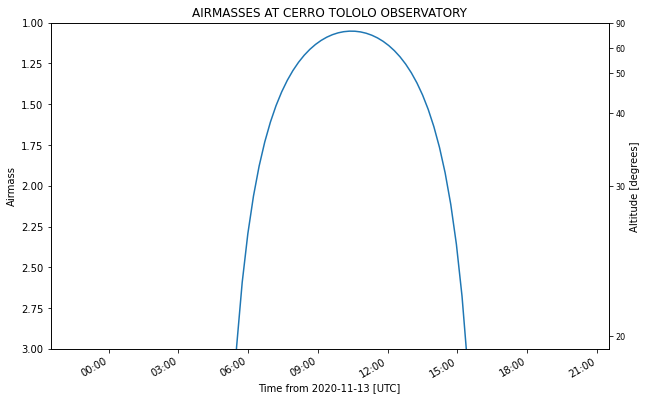

In [18]:
plt.figure(figsize=(10,6))  #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date 2020-11-11

plot_airmass(hydraA, ctio, observe_time, brightness_shading=True,altitude_yaxis=True)

plt.title('AIRMASSES AT CERRO TOLOLO OBSERVATORY',fontsize=12)
plt.xlabel('TIMES',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

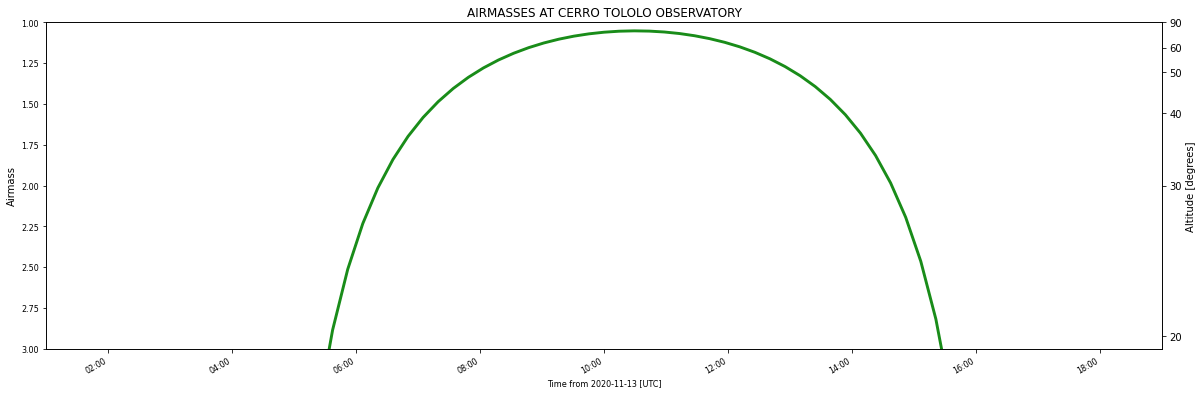

In [19]:
 #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date date range 
    
start_obs = Time('2020-11-13 01:00:00')
end_obs= Time('2020-11-13 19:00:00')
delta_t = end_obs - start_obs
observe_time2 = start_obs + delta_t*np.linspace(0, 1,75)
plt.figure(figsize=(20,6))  #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date 2020-11-11
styles = {'linestyle': '-', 'color': 'g', 'alpha': 0.9, 'linewidth': 2.9 } 
plt.title('AIRMASSES AT CERRO TOLOLO OBSERVATORY',fontsize=12)
plt.xlabel('TIMES',fontsize=8)
plt.xticks(fontsize=8)

plt.yticks(fontsize=8)
observe_time2 = start_obs + delta_t*np.linspace(0, 1,75)
plot_airmass(hydraA, ctio, observe_time2, altitude_yaxis=True,style_kwargs=styles)
plt.show()

In [20]:
#sunset and sunrise ,moonset and moonrise , twilight etc
#CTIO
sunset_ctio = ctio.sun_set_time(start_obs, which='nearest')
sunrise_ctio = ctio.sun_rise_time(start_obs, which='next')
sunset_ctio,sunrise_ctio=sunset_ctio.iso,sunrise_ctio.iso


moonset_ctio = ctio.moon_set_time(start_obs, which='nearest')
moonrise_ctio = ctio.moon_rise_time(start_obs, which='next')
moonrise_ctio,moonset_ctio=moonrise_ctio.iso,moonset_ctio.iso


twilight_morning_ctio=ctio.twilight_morning_astronomical(start_obs, which='nearest')
twilight_evening_ctio=ctio.twilight_evening_astronomical(start_obs, which='nearest')
twilight_morning_ctio,twilight_evening_ctio=twilight_morning_ctio.iso,twilight_evening_ctio.iso

#KMTNET
sunset_kmtnet = kmtnet.sun_set_time(start_obs, which='nearest')
sunrise_kmtnet = kmtnet.sun_rise_time(start_obs, which='next')
sunset_kmtnet,sunrise_kmtnet=sunset_kmtnet.iso,sunrise_kmtnet.iso


moonset_kmtnet = kmtnet.moon_set_time(start_obs, which='nearest')
moonrise_kmtnet = kmtnet.moon_rise_time(start_obs, which='next')
moonrise_kmtnet,moonset_kmtnet=moonrise_kmtnet.iso,moonset_kmtnet.iso


twilight_morning_kmtnet=kmtnet.twilight_morning_astronomical(start_obs, which='nearest')
twilight_evening_kmtnet=kmtnet.twilight_evening_astronomical(start_obs, which='nearest')
twilight_morning_kmtnet,twilight_evening_kmtnet=twilight_morning_kmtnet.iso,twilight_evening_kmtnet.iso

#MeerKAT

#sunset_meerkat = meerkat.sun_set_time(start_obs, which='nearest')
#sunrise_meerkat = meerkat.sun_rise_time(start_obs, which='next')
#sunset_meerkat,sunrise_meerkat=sunset_meerkat.iso,sunrise_meerkat.iso


#moonset_meerkat = meerkat.moon_set_time(start_obs, which='nearest')
#moonrise_meerkat = meerkat.moon_rise_time(start_obs, which='next')
#moonrise_meerkat,moonset_meerkat=moonrise_meerkat.iso,moonset_meerkat.iso


#twilight_morning_meerkat=meerkat.twilight_morning_astronomical(start_obs, which='nearest')
#twilight_evening_meerkat=meerkat.twilight_evening_astronomical(start_obs, which='nearest')
#twilight_morning_meerkat,twilight_evening_meerkat=twilight_morning_meerkat.iso,twilight_evening_meerkat.iso

#ASKAP

#sunset_askap = askap.sun_set_time(start_obs, which='nearest')
#sunrise_askap = askap.sun_rise_time(start_obs, which='next')
#sunset_askap,sunrise_askap=sunset_askap.iso,sunrise_askap.iso


#moonset_askap = askap.moon_set_time(start_obs, which='nearest')
#moonrise_askap = askap.moon_rise_time(start_obs, which='next')
#moonrise_askap,moonset_askap=moonrise_askap.iso,moonset_askap.iso


#twilight_morning_askap=askap.twilight_morning_astronomical(start_obs, which='nearest')
#twilight_evening_askap=askap.twilight_evening_astronomical(start_obs, which='nearest')
#twilight_morning_askap,twilight_evening_askap=twilight_morning_askap.iso,twilight_evening_askap.iso

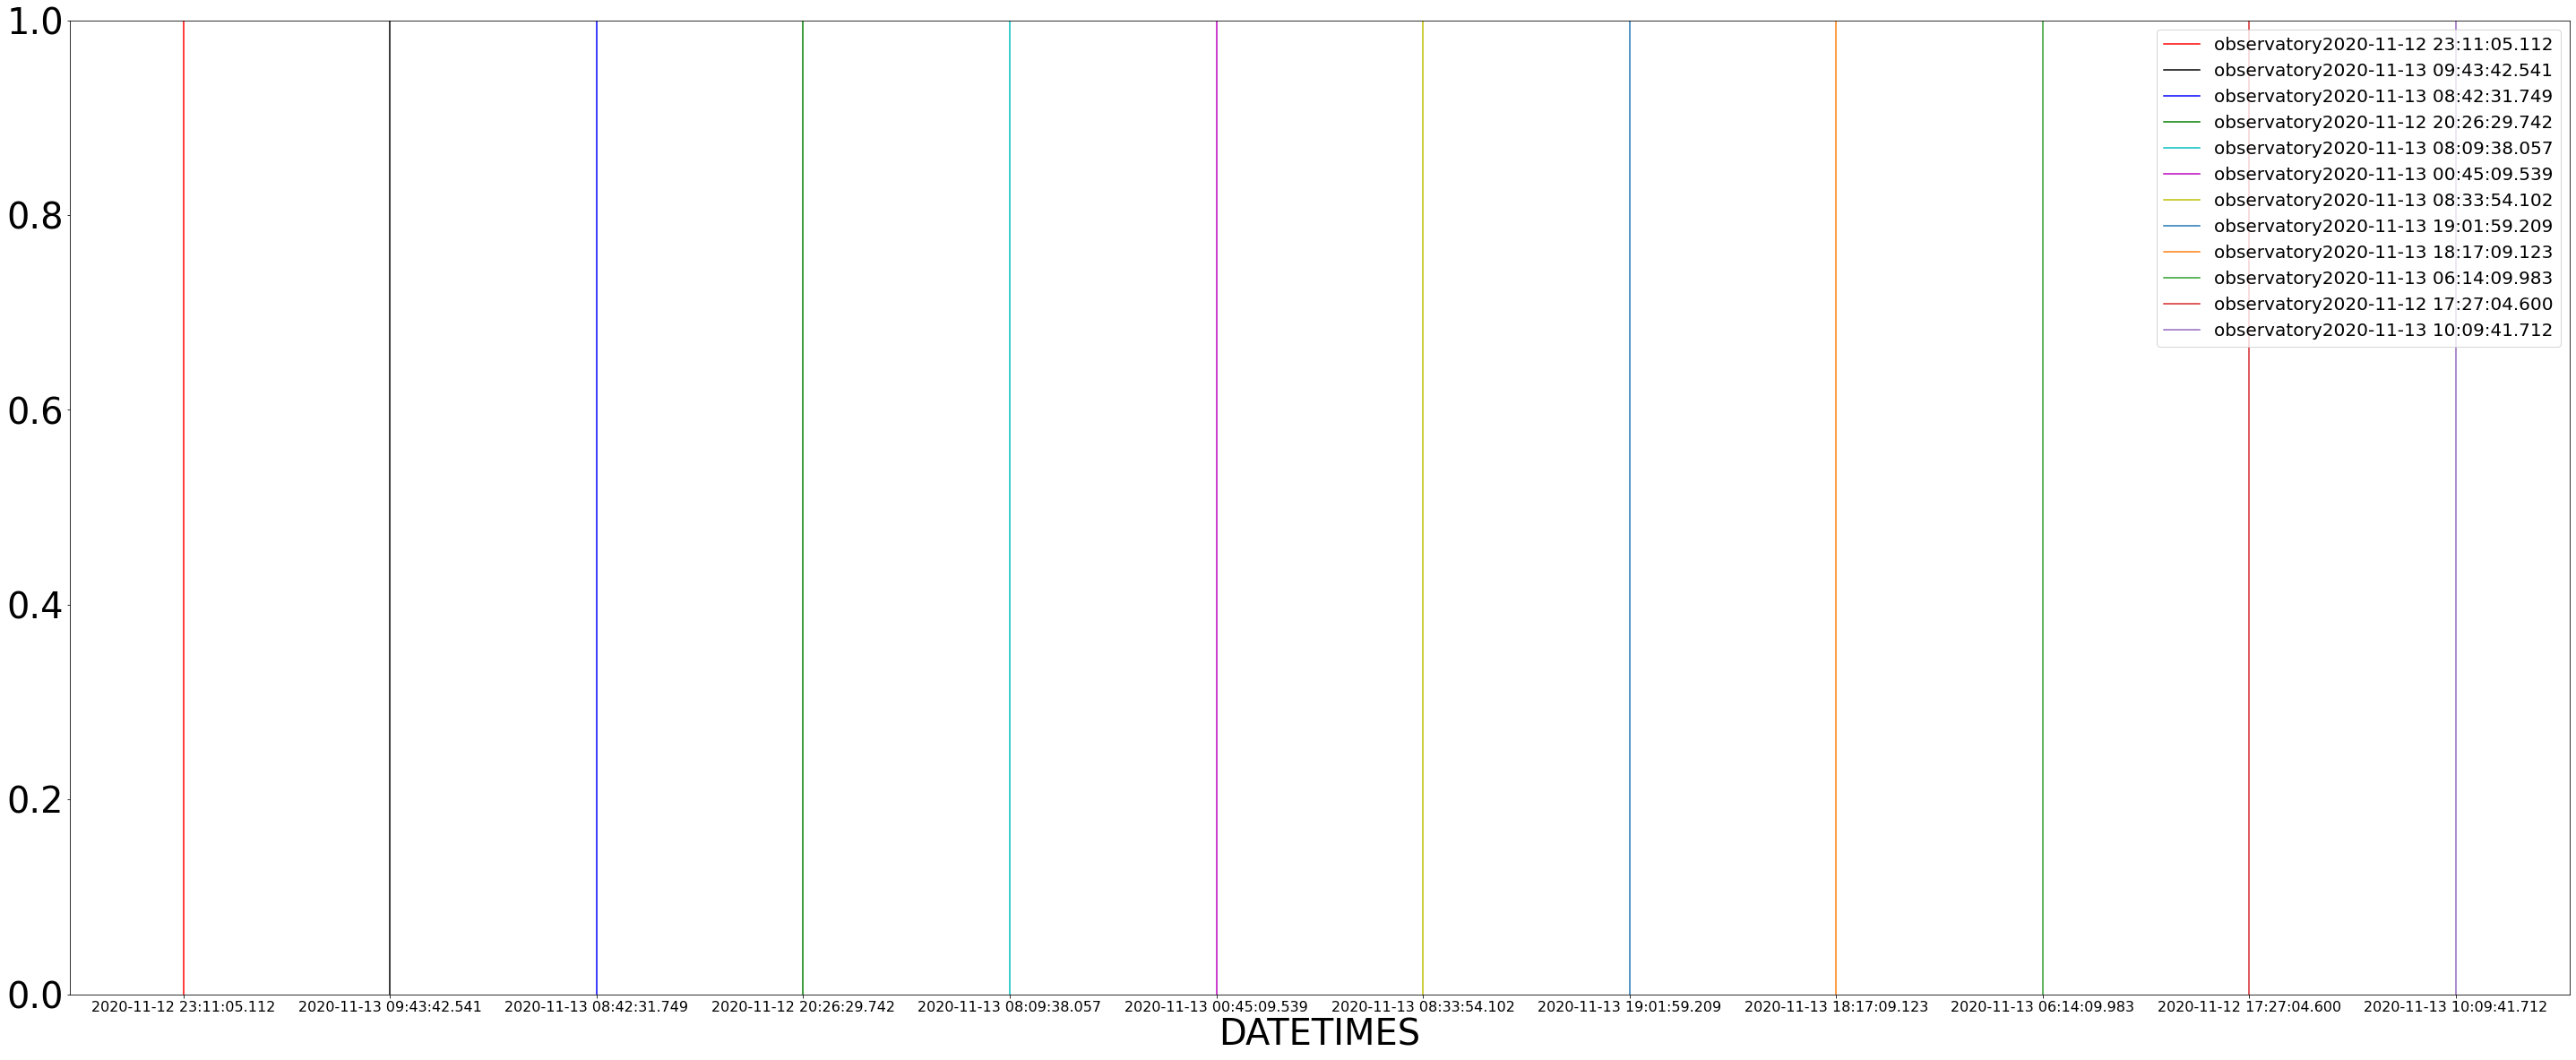

In [21]:
plt.figure(figsize=(50,20)) 

# x coordinates for the lines
xcoords = [sunset_ctio,sunrise_ctio,moonrise_ctio,moonset_ctio,twilight_morning_ctio,twilight_evening_ctio,
     sunset_kmtnet,sunrise_kmtnet,moonrise_kmtnet,moonset_kmtnet,twilight_morning_kmtnet,twilight_evening_kmtnet
          
          
          
          ]
# colors for the lines
colors = ['r','k','b','g','c','m','y','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc,label=('observatory'+xc), c=c)
plt.xlabel('DATETIMES',fontsize=40)
plt.xticks(fontsize=16)
#plt.ylabel('AIRMASSES',fontsize=40)
plt.yticks(fontsize=40)
plt.legend( loc=1, prop={'size': 20})
plt.show()

In [22]:
#Time Range

start_obs = Time('2020-11-17 01:00:00')
end_obs= Time('2020-11-18 19:00:00')
delta_t = end_obs - start_obs
observe_time2 = start_obs + delta_t*np.linspace(0, 1,75)

In [23]:
#Crude but should work

hydraA2=FixedTarget.from_name("Hydra_A", name='HydraA @CTIO')  
hydraA3=FixedTarget.from_name("Hydra_A", name='HydraA @KMTNET')
hydraA4=FixedTarget.from_name("Hydra_A", name='HydraA @MEERKAT')
hydraA5=FixedTarget.from_name("Hydra_A", name='HydraA @ASKAP')

print(moonrise_meerkat)
x=Time('2020-11-13 20:00:39.008')
x=x.iso

In [24]:
ctio_styles = {'linestyle': '-', 'color': 'r', 'alpha': 0.9, 'linewidth': 2.9 } #lINES STYLES 

In [25]:
start_obs = Time('2020-11-17 01:00:00')
end_obs= Time('2020-11-17 19:00:00')
delta_t = end_obs - start_obs
observe_time1 = start_obs + delta_t*np.linspace(0, 1,75)

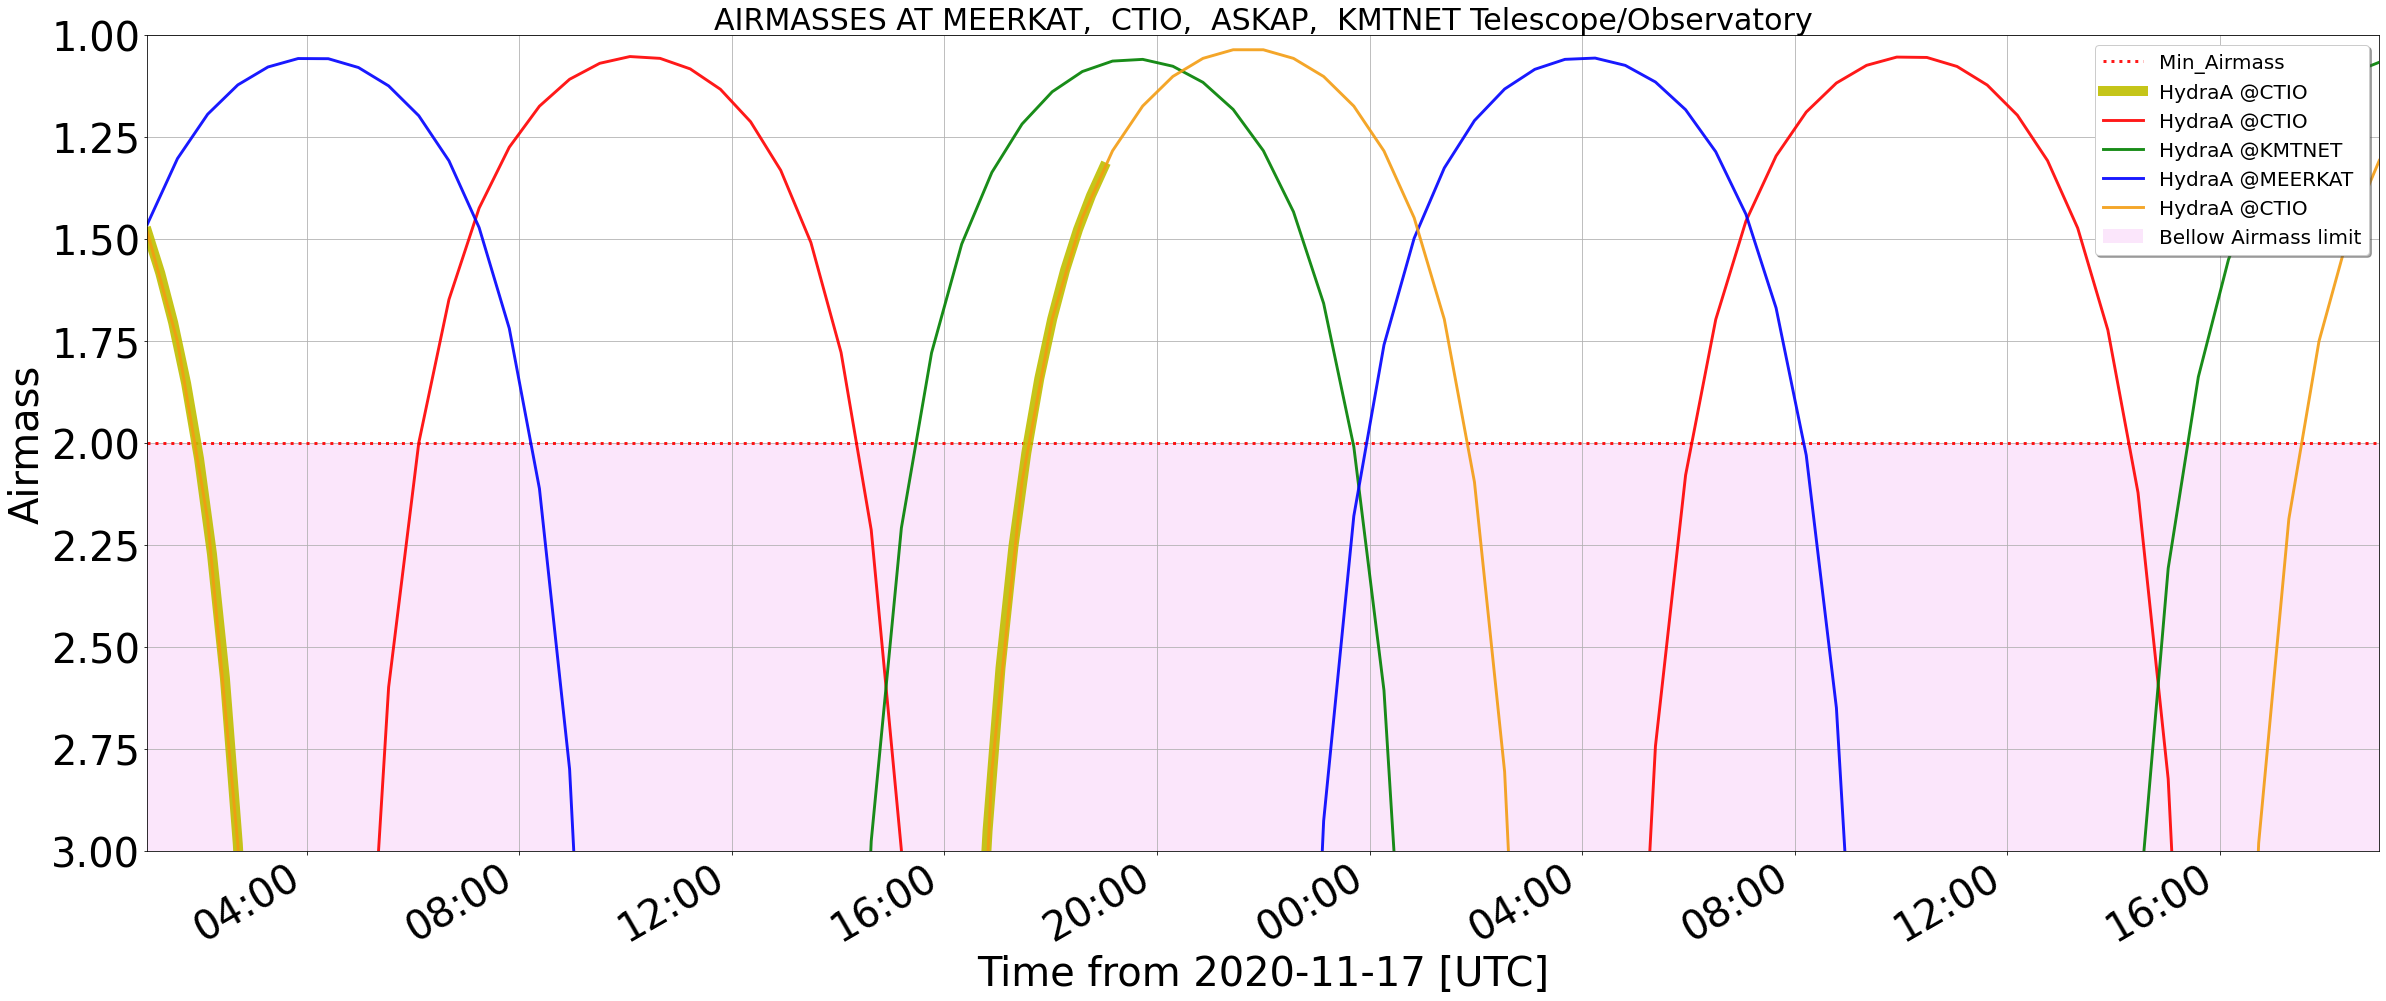

In [26]:
 #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date date range 
#print(observe_time2)
#print(moonrise_ctio)

plt.figure(figsize=(40,15))  #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date 2020-11-11


ctio_styles = {'linestyle': '-', 'color': 'r', 'alpha': 0.9, 'linewidth': 2.9 } #lINES STYLES 
kmtnet_styles = {'linestyle': '-', 'color': 'g', 'alpha': 0.9, 'linewidth': 2.9 } 
meerkat_styles = {'linestyle': '-', 'color': 'b', 'alpha': 0.9, 'linewidth': 2.9 }    
askap_styles = {'linestyle': '-', 'color': '#F39C12', 'alpha': 0.9, 'linewidth': 2.9 }    
askap_styles2 = {'linestyle': '-', 'color': 'y', 'alpha': 0.9, 'linewidth':10}   
    
plt.title('AIRMASSES AT' +' '+ meerkat.name.upper() + ',  '+ ctio.name.upper()+ ',  '+ askap.name.upper()+',  '+ kmtnet.name.upper()+''+' Telescope/Observatory',fontsize=30)
plt.xlabel('TIMES',fontsize=40)
plt.xticks(fontsize=40)
plt.ylabel('AIRMASSES',fontsize=40)
plt.yticks(fontsize=40)



#plt.axvline(x=moonrise_meerkat,color='blue',linestyle='-', label='Moonrise',alpha=0.9)
#Plotting airmasses 
plt.axhline(2,color='r',linestyle=':',linewidth=3, label='Min_Airmass',alpha=0.9)
plot_airmass(hydraA2, askap, observe_time1 ,style_kwargs=askap_styles2)
plot_airmass(hydraA2, ctio, observe_time2,  min_airmass=2,style_kwargs=ctio_styles)
plot_airmass(hydraA3, kmtnet, observe_time2, min_airmass=2, style_kwargs=kmtnet_styles)
plot_airmass(hydraA4, meerkat, observe_time2, style_kwargs=meerkat_styles)
plot_airmass(hydraA2, askap, observe_time2,style_kwargs=askap_styles)
plt.axhspan(3, 2, facecolor='violet', alpha=0.2,label='Bellow Airmass limit')
#plt.plot(moonphase,label='moonphase')


#plt.axvline(x=x,color='blue',linestyle='-', label='Moonrise',alpha=0.9)
#plt.axvline(x=moonset_kmtnet,color='purple',linestyle='-',linewidth=2.3, label='Moonset',alpha=0.9)


#plt.axvline(x=sunrise_CT,color='orange',linestyle='-',label='Sunrise',alpha=0.9)
plt.legend(shadow=True, loc=1, prop={'size': 20})
plt.grid()
plt.show()

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from collections import Sequence
import operator
def plot_airmass3(targets, observer, time, ax=None, style_kwargs=None,
                 style_sheet=None, brightness_shading=False,
                 altitude_yaxis=False, min_airmass=1.0, min_region=None,
                 max_airmass=3.0, max_region=None):
    r"""
    Plots airmass as a function of time for a given target.

    If a `~matplotlib.axes.Axes` object already exists, an additional
    airmass plot will be "stacked" on it.  Otherwise, creates a new
    `~matplotlib.axes.Axes` object and plots airmass on top of that.

    When a scalar `~astropy.time.Time` object is passed in (e.g.,
    ``Time('2000-1-1')``), the resulting plot will use a 24-hour window
    centered on the time indicated, with airmass sampled at regular
    intervals throughout.
    However, the user can control the exact number and frequency of airmass
    calculations used by passing in a non-scalar `~astropy.time.Time`
    object. For instance, ``Time(['2000-1-1 23:00:00', '2000-1-1
    23:30:00'])`` will result in a plot with only two airmass measurements.

    For examples with plots, visit the documentation of
    :ref:`plots_time_dependent`.

    Parameters
    ----------
    targets : list of `~astroplan.FixedTarget` objects
        The celestial bodies of interest.
        If a single object is passed it will be converted to a list.

    observer : `~astroplan.Observer`
        The person, telescope, observatory, etc. doing the observing.

    time : `~astropy.time.Time`
        If scalar (e.g., ``Time('2000-1-1')``), will result in plotting target
        airmasses once an hour over a 24-hour window.
        If non-scalar (e.g., ``Time(['2000-1-1'])``, ``[Time('2000-1-1')]``,
        ``Time(['2000-1-1', '2000-1-2'])``),
        will result in plotting data at the exact times specified.

    ax : `~matplotlib.axes.Axes` or None, optional.
        The `~matplotlib.axes.Axes` object to be drawn on.
        If None, uses the current ``Axes``.

    style_kwargs : dict or None, optional.
        A dictionary of keywords passed into `~matplotlib.pyplot.plot_date`
        to set plotting styles.

    style_sheet : dict or `None` (optional)
        matplotlib style sheet to use. To see available style sheets in
        astroplan, print *astroplan.plots.available_style_sheets*. Defaults
        to the light theme.

    brightness_shading : bool
        Shade background of plot to scale roughly with sky brightness. Dark
        shading signifies times when the sun is below the horizon. Default
        is `False`.

    altitude_yaxis : bool
        Add alternative y-axis on the right side of the figure with target
        altitude. Default is `False`.

    min_airmass : float
        Lower limit of y-axis airmass range in the plot. Default is ``1.0``.

    max_airmass : float
        Upper limit of y-axis airmass range in the plot. Default is ``3.0``.

    min_region : float
        If set, defines an interval between ``min_airmass`` and ``min_region``
        that will be shaded. Default is `None`.

    max_region : float
        If set, defines an interval between ``max_airmass`` and ``max_region``
        that will be shaded. Default is `None`.

    Returns
    -------
    ax : `~matplotlib.axes.Axes`
        An ``Axes`` object with added airmass vs. time plot.

    Notes
    -----
    y-axis is inverted and shows airmasses between 1.0 and 3.0 by default.
    If user wishes to change these, use ``ax.<set attribute>`` before drawing
    or saving plot:

    """
    # Import matplotlib, set style sheet
    if style_sheet is not None:
        _set_mpl_style_sheet(style_sheet)

    import matplotlib.pyplot as plt
    from matplotlib import dates

    # Set up plot axes and style if needed.
    if ax is None:
        ax = plt.gca()
    if style_kwargs is None:
        style_kwargs = {}
    style_kwargs = dict(style_kwargs)
    style_kwargs.setdefault('linestyle', '-')
    style_kwargs.setdefault('linewidth', 1.5)
    style_kwargs.setdefault('fmt', '-')

    # Populate time window if needed.
    time = Time(time)
    if time.isscalar:
        time = time + np.linspace(-12, 12, 100)*u.hour
    elif len(time) == 1:
        warnings.warn('You used a Time array of length 1.  You probably meant '
                      'to use a scalar. (Or maybe a list with length > 1?).',
                      PlotWarning)

    if not isinstance(targets, Sequence):
        targets = [targets]

    for target in targets:
        # Calculate airmass
        airmass = observer.altaz(time, target).secz
        # Mask out nonsense airmasses
        masked_airmass = np.ma.array(airmass, mask=airmass < 1)

        # Some checks & info for labels.
        try:
            target_name = target.name
        except AttributeError:
            target_name = ''

        # Plot data
        ax.plot_date(time.plot_date, masked_airmass, label=target_name, **style_kwargs)
        
    # Format the time axis
    ax.set_xlim([time[0].plot_date, time[-1].plot_date])
    date_formatter = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(date_formatter)
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    # Shade background during night time
    if brightness_shading:
        start = time[0].datetime

        # Calculate and order twilights and set plotting alpha for each
        twilights = [
            (observer.sun_set_time(Time(start), which='next').datetime, 0.0),
            (observer.twilight_evening_civil(Time(start), which='next').datetime, 0.1),
            (observer.twilight_evening_nautical(Time(start), which='next').datetime, 0.2),
            (observer.twilight_evening_astronomical(Time(start), which='next').datetime, 0.3),
            (observer.twilight_morning_astronomical(Time(start), which='next').datetime, 0.4),
            (observer.twilight_morning_nautical(Time(start), which='next').datetime, 0.3),
            (observer.twilight_morning_civil(Time(start), which='next').datetime, 0.2),
            (observer.sun_rise_time(Time(start), which='next').datetime, 0.1),
        ]

        twilights.sort(key=operator.itemgetter(0))
        for i, twi in enumerate(twilights[1:], 1):
            ax.axvspan(twilights[i - 1][0], twilights[i][0],
                       ymin=0, ymax=1, color='grey', alpha=twi[1])

    # Invert y-axis and set limits.
    y_lim = ax.get_ylim()
    if y_lim[1] > y_lim[0]:
        ax.invert_yaxis()
    ax.set_ylim([max_airmass, min_airmass])
    
    ax.axhline(2,color='purple',linestyle='-',linewidth=2.3, label='Moonset',alpha=0.9)
    
    # Draw lo/hi limit regions, if present
    ymax, ymin = ax.get_ylim()       # should be (hi_limit, lo_limit)

    if max_region is not None:
        ax.axhspan(ymax, max_region, facecolor='#F9EB4E', alpha=0.10)
    if min_region is not None:
        ax.axhspan(min_region, ymin, facecolor='#F9EB4E', alpha=0.10)

    # Set labels.
    ax.set_ylabel("Airmass")
    ax.set_xlabel("Time from {0} [UTC]".format(min(time).datetime.date()))

    if altitude_yaxis and not _has_twin(ax):
        altitude_ticks = np.array([90, 60, 50, 40, 30, 20])
        airmass_ticks = 1./np.cos(np.radians(90 - altitude_ticks))

        ax2 = ax.twinx()
        
        ax2.invert_yaxis()
        ax2.set_yticks(airmass_ticks)
        ax2.set_yticklabels(altitude_ticks)
        ax2.set_ylim(ax.get_ylim())
        ax2.set_ylabel('Altitude [degrees]')

    # Redraw figure for interactive sessions.
    ax.figure.canvas.draw()

    # Output.
    return ax

In [ ]:
ctio_styles = {'linestyle': '-', 'color': 'r', 'alpha': 0.9, 'linewidth': 2.9 } #lINES STYLES 
plot_airmass3(hydraA, ctio, observe_time1, brightness_shading=True, style_kwargs=ctio_styles)
#ax.axvline(x=moonset_kmtnet,color='purple',linestyle='-',linewidth=2.3, label='Moonset',alpha=0.9)
plt.legend()

In [ ]:
    
start= Time('2020-11-14 01:00:00')
end= Time('2021-01-30 19:00:00')
delta_t = end - start
observe_time2 = start + delta_t*np.linspace(0, 1,75)

In [ ]:
astroplan.moon_phase_angle?

#module calculates lunar phase angle for a geocentric using solar_system_ephemeris

In [ ]:
ctio_styles = {'linestyle': '-', 'color': 'r', 'alpha': 0.9, 'linewidth': 2.9 } #lINES STYLES 
plot_airmass2(hydraA, ctio, observe_times, brightness_shading=True, style_kwargs=ctio_styles)
#ax.axvline(x=moonset_kmtnet,color='purple',linestyle='-',linewidth=2.3, label='Moonset',alpha=0.9)
plt.legend()

In [ ]:
plot_airmass3(hydraA2, ctio, observe_time2, brightness_shading=True, style_kwargs=ctio_styles)

In [ ]:
from ephem import *
import ephem
from astropy.coordinates import get_moon

In [ ]:
time=Time.now()
time
get_moon(time)

c = SkyCoord(ra=309.24866517*u.degree, dec=-22.47513094*u.degree)
c.to_string('hmsdms')

In [ ]:
from astroplan.plots import plot_sky

α☾ = 20:36:45   , δ☾ = -21:44:15
#HydraAs = ephem.Body('139d31m24.765s','-12d05m43.99s')
#s = ephem.separation(moon, HydraAs)
#s

guide_style = {'marker': '*'}

#plot_sky(polaris, observer, observe_time, snorth_to_east_ccw=False, style_kwargs=guide_style)
plot_sky(hydraA, ctio, observe_time, north_to_east_ccw=False)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

In [ ]:
#frbs=pd.read_csv('frbcat_20201110.csv')
#FRBs=pd.DataFrame(frbs)
#FRBs